In [147]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [148]:
bc = pd.read_csv('BreastCancer.csv',index_col=0)
bc

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,Malignant
1371026,5,10,10,10,4,10,5,6,3,Malignant
1371920,5,1,1,1,2,1,3,2,1,Benign


In [149]:
data = bc.drop(columns='Class')
data

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
Code,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1
63375,9,1,2,6,4,10,7,7,2
76389,10,4,7,2,2,8,6,1,1
95719,6,10,10,10,8,10,7,10,7
128059,1,1,1,1,2,5,5,1,1
...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7
1371026,5,10,10,10,4,10,5,6,3
1371920,5,1,1,1,2,1,3,2,1


In [150]:
scaler = StandardScaler().set_output(transform='pandas')
bc_scaled = scaler.fit_transform(data)

In [151]:
prcomp = PCA().set_output(transform='pandas')
scores = prcomp.fit_transform(bc_scaled)
scores

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
61634,-0.661561,-0.168216,0.583962,-0.439347,-0.230526,0.130653,-0.097528,0.541727,0.328081
63375,2.178759,-0.693348,0.432389,1.192376,-1.074153,-0.442691,-0.702441,-1.787781,-0.244667
76389,1.404956,-1.364750,1.761714,0.878367,0.013219,-0.517801,0.835375,0.408381,-0.565653
95719,6.073098,1.994961,-1.081435,0.237234,-0.141189,0.019790,-0.355352,0.444035,-0.062628
128059,-1.237518,-0.370332,-0.823064,0.473932,-0.127604,-1.151372,0.508269,-0.344131,0.029906
...,...,...,...,...,...,...,...,...,...
1369821,6.473443,1.285709,0.048059,0.936819,-1.446932,0.152226,0.731058,0.235807,-0.042668
1371026,4.097345,-0.215083,-1.078721,0.912918,0.027151,0.599090,-0.276698,1.705969,0.099999
1371920,-1.351669,-0.095164,0.536224,-0.120275,-0.359013,0.101649,0.178219,-0.452815,0.002252


In [152]:
scores.var()

pca0    5.899333
pca1    0.777475
pca2    0.539624
pca3    0.462914
pca4    0.380272
pca5    0.305723
pca6    0.296021
pca7    0.262712
pca8    0.088819
dtype: float64

In [153]:
prcomp.explained_variance_ratio_*100

array([65.45437483,  8.62625123,  5.98724547,  5.13612665,  4.21920122,
        3.39206535,  3.28441735,  2.91485025,  0.98546764])

In [154]:
65.45437483 +  8.62625123

74.08062606

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt 

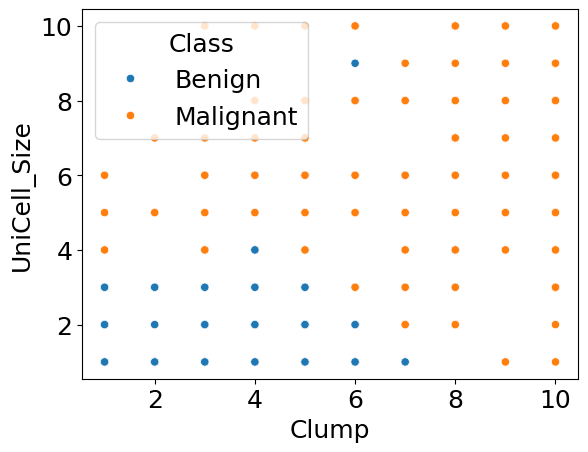

In [156]:
sns.scatterplot(data = bc, x = 'Clump',y = 'UniCell_Size',hue = 'Class')
plt.show()

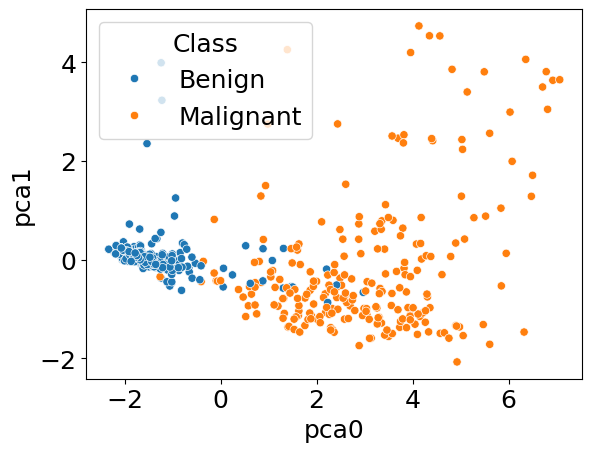

In [157]:
df_pca = scores.copy()
df_pca['Class'] = bc['Class']
df_pca
sns.scatterplot(data = df_pca, x = 'pca0',y = 'pca1',hue = 'Class')
plt.show()

In [158]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer, make_column_selector 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import log_loss, accuracy_score, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# PCA + Logistic Regression

In [164]:
X = bc.drop(columns='Class')
y = bc['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24,test_size=0.3, stratify=y)

scaler = StandardScaler()
log = LogisticRegression(random_state=24)
# prcomp = PCA().set_output(transform='pandas'
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
x_trn_pca = pipe_pca.fit_transform(X_train)
log.fit(x_trn_pca.iloc[:,:3],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = log.predict(X_tst_pca.iloc[:,:3])
print(accuracy_score(y_test,y_pred))

0.9619047619047619


In [166]:
X = bc.drop(columns='Class')
y = bc['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24,test_size=0.3, stratify=y)

scaler = StandardScaler()
log = LogisticRegression(random_state=24)
prcomp = PCA(n_components=4).set_output(transform='pandas')

pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
x_trn_pca = pipe_pca.fit_transform(X_train)
log.fit(x_trn_pca,y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = log.predict(X_tst_pca)
print(accuracy_score(y_test,y_pred))

0.9714285714285714
